In [1]:
# Loading Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# Reading Dataset 
hr = pd.read_csv('Human Resources Data Set.csv')
hr.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [3]:
hr.corr()

satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.105021       -0.142970   
last_evaluation                  0.105021         1.000000        0.349333   
number_project                  -0.142970         0.349333        1.000000   
average_montly_hours            -0.020048         0.339742        0.417211   
time_spend_company              -0.100866         0.131591        0.196786   
Work_accident                    0.058697        -0.007104       -0.004741   
left                            -0.388375         0.006567        0.023787   
promotion_last_5years            0.025605        -0.008684       -0.006064   

                       average_montly_hours  time_spend_company  \
satisfaction_level                -0.020048           -0.100866   
last_evaluation                    0.339742            0.131591   
number_project                     0.417211            0.196786   
average_montly_hours               1.000000            0.127755   
time_spend_company                 0.127755            1.000000   
Work_accident                     -0.010143            0.002120   
left                               0.071287            0.144822   
promotion_last_5years             -0.003544            0.067433   

                       Work_accident      left  promotion_last_5years  
satisfaction_level          0.058697 -0.388375               0.025605  
last_evaluation            -0.007104  0.006567              -0.008684  
number_project             -0.004741  0.023787              -0.006064  
average_montly_hours       -0.010143  0.071287              -0.003544  
time_spend_company          0.002120  0.144822               0.067433  
Work_accident               1.000000 -0.154622               0.039245  
left                       -0.154622  1.000000              -0.061788  
promotion_last_5years       0.039245 -0.061788               1.000000

In [4]:
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

satisfaction_level: Measures the employee’s job satisfaction on a scale from 0 to 1.
    
last_evaluation: Score of the employee’s most recent performance evaluation (0 to 1).
    
number_project: Total number of projects the employee has worked on

average_montly_hours: Average hours worked by the employee per month.
    
time_spend_company: Number of years the employee has been with the company.
    
Work_accident: Indicates if the employee experienced a workplace accident (0: No, 1: Yes).
    
left: Shows whether the employee left the company (0: No, 1: Yes).
    
promotion_last_5years: Indicates if the employee was promoted in the last five years (0: No, 1: Yes).
    
Department: The functional area or department where the employee works.
    
salary: Categorical value representing the employee’s salary level (low, medium, high).

In [5]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
# Convert the 'Work_accident','left','promotion_last_5years' column to categorical

hr['Work_accident'] = hr['Work_accident'].astype('object')
hr['left'] = hr['left'].astype('object')
hr['promotion_last_5years'] = hr['promotion_last_5years'].astype('object')

## Data Preparation

### Variables Types and Definitions

The first stage of this analysis is to describe the dataset, understand the meaning of variable and perform the necessary adjustments to ensure that the data will be proceeded correctly during the Machine Learning process.

In [7]:
# Shape of the data frame
print('Rows:', hr.shape[0], '| Columns:', hr.shape[1])

Rows: 14999 | Columns: 10


In [8]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  object 
 6   left                   14999 non-null  object 
 7   promotion_last_5years  14999 non-null  object 
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 1.1+ MB


The dataset consists in 14,999 rows and 10 columns. Each row represents an employee, and each column contains one employee attribute. None of these attributes contains any NA. Two (2) of these attributes contain decimal numbers, three (3) contain integers, three (3) contain booleans, and two (2) contain categorical values.

In [9]:
# Summarize numercial variables
hr.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  
count          14999.000000        14999.000000  
mean             201.050337            3.498233  
std               49.943099            1.460136  
min               96.000000            2.000000  
25%              156.000000            3.000000  
50%              200.000000            3.000000  
75%              245.000000            4.000000  
max              310.000000           10.000000

In [10]:
hr.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [11]:
print("Work_accident:")
print(hr['Work_accident'].value_counts())
print("\n")  # Add a blank line for readability

print("left:")
print(hr['left'].value_counts())
print("\n")

print("promotion_last_5years:")
print(hr['promotion_last_5years'].value_counts())
print("\n")

print("Department:")
print(hr['Department'].value_counts())
print("\n")

print("salary:")
print(hr['salary'].value_counts())

Work_accident:
0    12830
1     2169
Name: Work_accident, dtype: int64


left:
0    11428
1     3571
Name: left, dtype: int64


promotion_last_5years:
0    14680
1      319
Name: promotion_last_5years, dtype: int64


Department:
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64


salary:
low       7316
medium    6446
high      1237
Name: salary, dtype: int64


### Count plot

### Attrition (Left) by Department

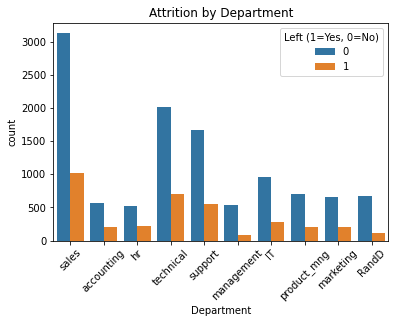

In [12]:
sns.countplot( x='Department', hue='left',data=hr)
plt.xticks(rotation=45)
plt.title('Attrition by Department')
plt.legend(title='Left (1=Yes, 0=No)')
plt.show()

### Promotion Last 5 Years by Department

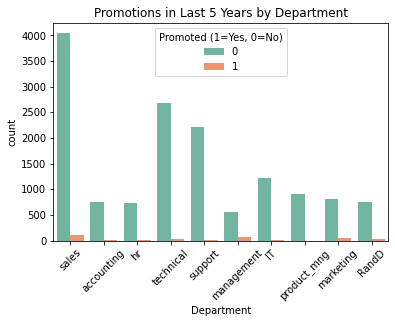

In [13]:
sns.countplot(x='Department', hue='promotion_last_5years',data=hr, palette='Set2')
plt.xticks(rotation=45)
plt.title('Promotions in Last 5 Years by Department')
plt.legend(title='Promoted (1=Yes, 0=No)')
plt.show()


### Scatter plot

### Average Monthly Hours vs. Number of Projects

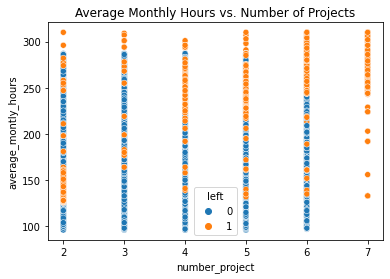

In [14]:
sns.scatterplot(x='number_project', y='average_montly_hours',data=hr, hue='left')
plt.title('Average Monthly Hours vs. Number of Projects')
plt.show()

### Bar plot: Work Accidents by Salary

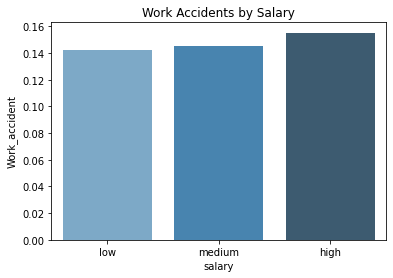

In [15]:
sns.barplot(x='salary', y='Work_accident',ci=None,data=hr, palette='Blues_d')
plt.title('Work Accidents by Salary')
plt.show()

### Average Satisfaction Level by Department

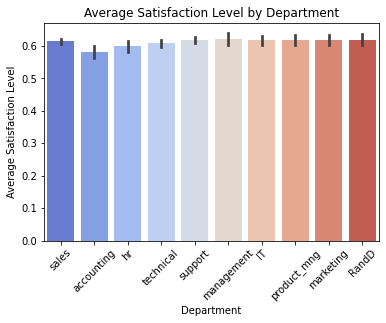

In [16]:
sns.barplot( x='Department', y='satisfaction_level',data=hr, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Average Satisfaction Level by Department')
plt.xlabel('Department')
plt.ylabel('Average Satisfaction Level')
plt.show()

### Box Plot: Satisfaction Level by Salary

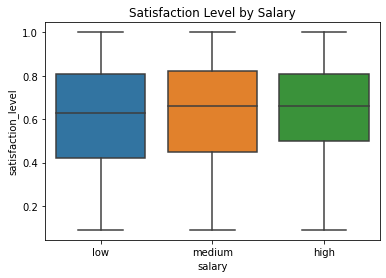

In [17]:
sns.boxplot(x='salary', y='satisfaction_level',data=hr)
plt.title('Satisfaction Level by Salary')
plt.show()

### Average Monthly Hours by Salary

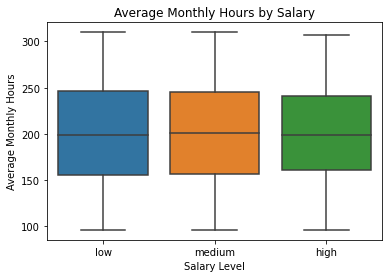

In [18]:
sns.boxplot(x='salary', y='average_montly_hours',data=hr)
plt.title('Average Monthly Hours by Salary')
plt.xlabel('Salary Level')
plt.ylabel('Average Monthly Hours')
plt.show()

### Violin Plot: Time Spent in Company and Attrition

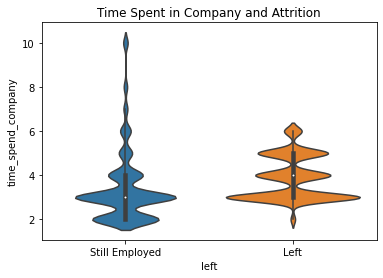

In [19]:
sns.violinplot(x='left', y='time_spend_company', split=True,data=hr)
plt.title('Time Spent in Company and Attrition')
plt.xticks([0, 1], ['Still Employed', 'Left'])
plt.show()

### Strip Plot: Time Spent at Company by Salary

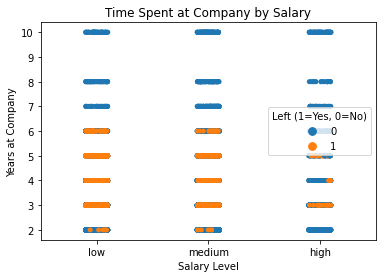

In [20]:
sns.stripplot(data=hr, x='salary', y='time_spend_company', jitter=True, hue='left')
plt.title('Time Spent at Company by Salary')
plt.xlabel('Salary Level')
plt.ylabel('Years at Company')
plt.legend(title='Left (1=Yes, 0=No)')
plt.show()

In [22]:
pip install --upgrade matplotlib seaborn pandas

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.



  Attempting uninstall: python-dateutil
    Found existing installation: python-dateutil 2.8.1
    Uninstalling python-dateutil-2.8.1:
      Successfully uninstalled python-dateutil-2.8.1
  Attempting uninstall: pandas
    Found existing installation: pandas 1.2.4
    Uninstalling pandas-1.2.4:
      Successfully uninstalled pandas-1.2.4
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.1
    Uninstalling seaborn-0.11.1:
      Successfully uninstalled seaborn-0.11.1


### Joint Plot: Satisfaction Level vs. Last Evaluation

In [ ]:
sns.jointplot(x='satisfaction_level', y='last_evaluation',data=hr, hue='left', kind='scatter')
plt.suptitle('Satisfaction Level vs. Last Evaluation')
plt.show()

### Histogram: Distribution of Satisfaction Levels

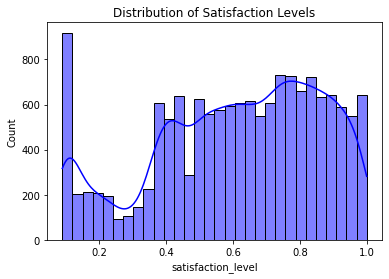

In [23]:
sns.histplot(data=hr, x='satisfaction_level', kde=True, color='blue')
plt.title('Distribution of Satisfaction Levels')
plt.show()

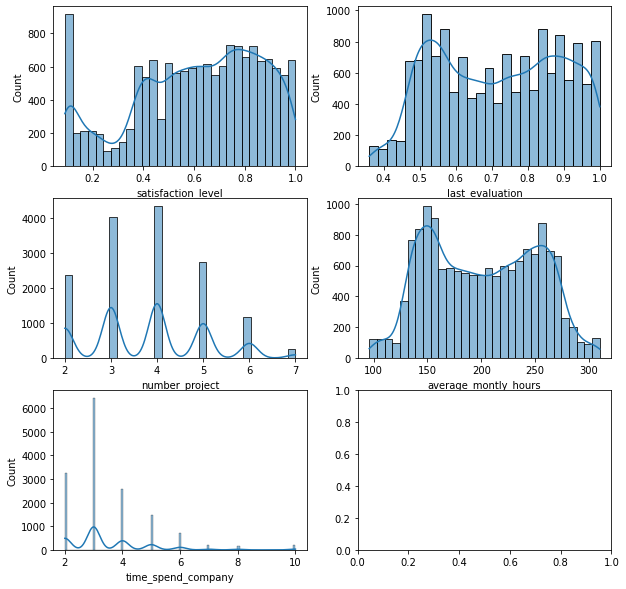

In [24]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(10,10)
sns.histplot(hr['satisfaction_level'], kde=True, ax=axes[0][0])
sns.histplot(hr['last_evaluation'] , kde=True, ax=axes[0][1])
sns.histplot(hr['number_project'], kde=True, ax=axes[1][0])
sns.histplot(hr['average_montly_hours'], kde=True, ax=axes[1][1])
sns.histplot(hr['time_spend_company'], kde=True, ax=axes[2][0])
plt.show()

### Pairplot

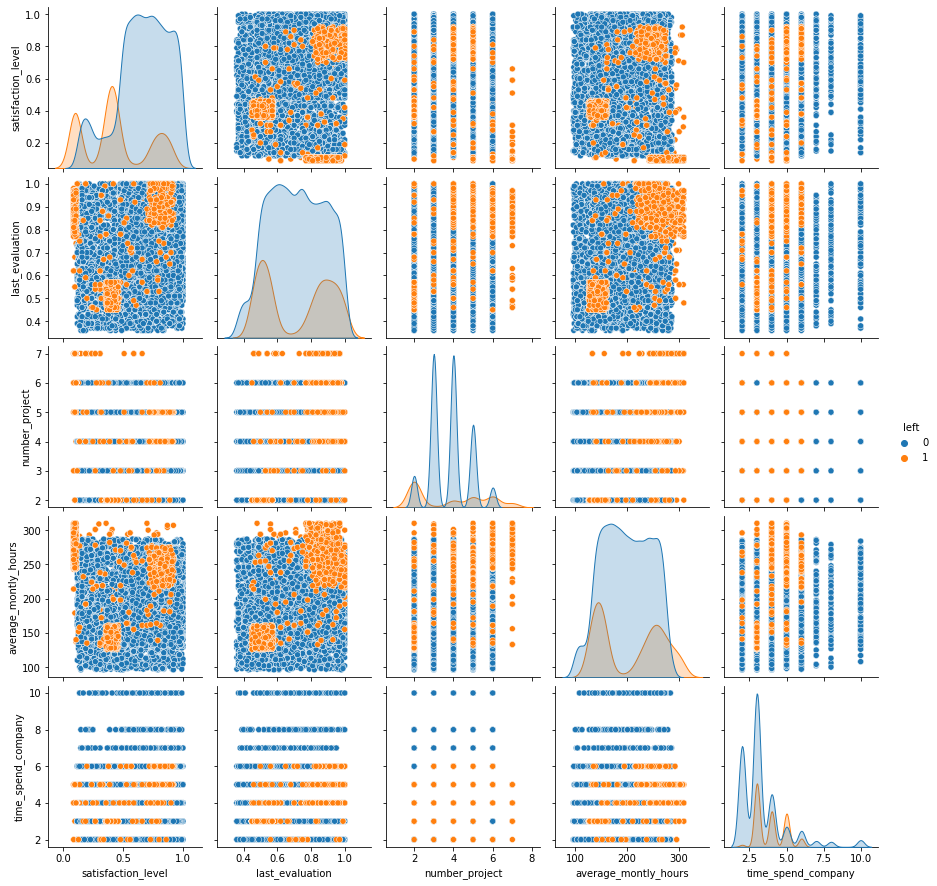

In [25]:
sns.pairplot(hr[['satisfaction_level', 'last_evaluation', 'number_project','average_montly_hours', 'time_spend_company','left']], hue='left')


#### Correlation Analysis

A correlation analysis will allow to identify relationships between the dataset variables. A plot of their distributions highlighting the value of the target variable might also reveal some patterns.

In [26]:
hr.corr()

satisfaction_level  last_evaluation  number_project  \
satisfaction_level              1.000000         0.105021       -0.142970   
last_evaluation                 0.105021         1.000000        0.349333   
number_project                 -0.142970         0.349333        1.000000   
average_montly_hours           -0.020048         0.339742        0.417211   
time_spend_company             -0.100866         0.131591        0.196786   

                      average_montly_hours  time_spend_company  
satisfaction_level               -0.020048           -0.100866  
last_evaluation                   0.339742            0.131591  
number_project                    0.417211            0.196786  
average_montly_hours              1.000000            0.127755  
time_spend_company                0.127755            1.000000

No strong correlation appears in the dataset. However:
- `number_project` and `average_monthly_hours` have a **moderate positive** correlation (0.42).
- `last_evaluation` and `number_project` have a **moderate positive** correlation (0.35).
- `last_evaluation` and `average_monthly_hours` have a **moderate positive** correlation (0.34).

<Axes: >

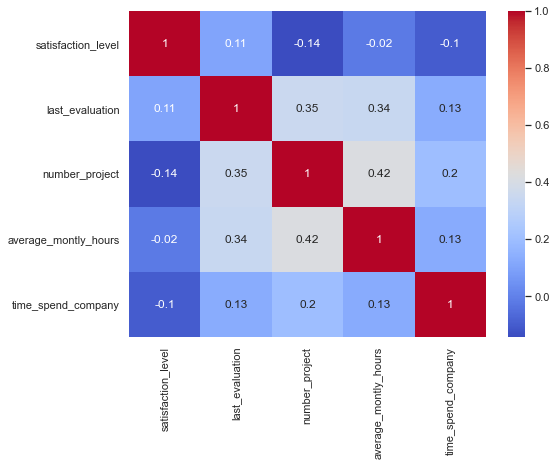

In [27]:
plt.figure(figsize=(8,6))
sns.set(font_scale=1.0)
sns.heatmap(hr[['satisfaction_level', 'last_evaluation', 'number_project','average_montly_hours', 'time_spend_company']].corr(), annot=True,cmap='coolwarm')

In [ ]:
hr.corr()